**bold text**#**APPLE Stock Data Analysis 📈**
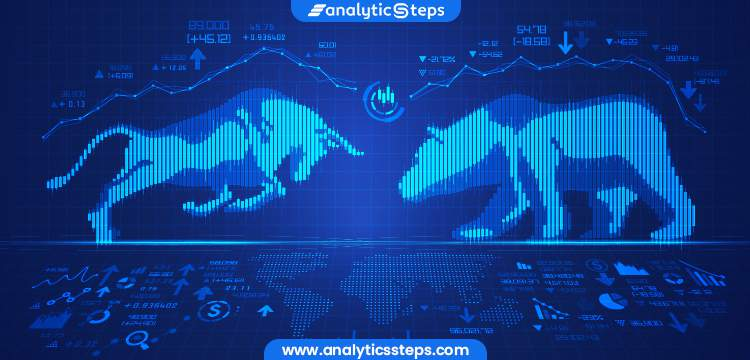
# Context
Stock market plays a pivotal role in financial aspect of the nation's growth, but stock market is
highly volatile and complex in nature. It is affected by significant political issues, analyst calls, news
articles , company's future plans of expansions and growth and many more. Hence, any investor would
be interested in understanding the stock market overtime and how the factors mentioned above affect
the behavior of the stock market.

On Every business day, millions of traders invest in stock market. Most of these investors lose
money and others gain. However, considering any trading day, loss or gain is absolutely inconsistent.
The demand to predict stock prices are extremely high, hence is the need for stock market analysis.
This project is focused on analyzing a stock of any given company based on statistical technical
indicators. Some of these indicators are deterministic in nature and the remaining are probabilistic. The
objective of this project is to minimize the risk of loss in every trade thereby maximizing the profit.


# Objective
Stock Market Analysis is a method in which the investors and traders make buying and selling decisions by studying and analyzing data history and present data. It allows the investors to understand the security that a stock can provide, before investing in it. There are stock analysts who perform thorough research to find out any activity at any sector of the stock market.

By using stock market analysis, investors and traders can reach buying and selling decisions faster.
#Data Description
This dataset provides historical data of APPLE INC. stock (AAPL). The data is available at a daily level. Currency is USD.The data contains the different data related to stock market. The detailed data dictionary is given below.

#Data Dictionary
*   Open - The opening price for the specified date(s).
*   High - The current day's high price.
*   Low - The current day's low price.
*   Close -The closing price for the specified date(s).
*   Adj Close -The price of the stock after paying off the dividends.
*   Volume - The current day's trading volume.
*   Date

Stock Market Data From Google Finance


# Introduction
Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Google Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Used google finance to get stock information, used pandas for visualize different aspects of it, and finally looked at a few ways of analyzing the stock, based on its previous performance history. Predicted future stock prices through a ARMA and ARIMA.

## Let us start by importing the required libraries

In [ ]:
# For Data Processing
import numpy as np
import pandas as pd
#from pandas import Series, DataFrame

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

# Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/AAPL.csv')
# returns the first 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,0.936384,1.004464,0.907924,0.999442,0.855797,535796800
1,04-01-2000,0.966518,0.987723,0.903460,0.915179,0.783644,512377600
2,05-01-2000,0.926339,0.987165,0.919643,0.928571,0.795112,778321600
3,06-01-2000,0.947545,0.955357,0.848214,0.848214,0.726304,767972800
4,07-01-2000,0.861607,0.901786,0.852679,0.888393,0.760708,460734400


Observations:
The DataFrame has 7 columns as mentioned in the Data Dictionary. Data in each row corresponds to the day of stock prices details.

Question 1: How many rows and columns are present in the data?

In [ ]:
print('the data frame has',df.shape[0],'rows and',df.shape[1],'columns')

the data frame has 5284 rows and 7 columns


Observations: We have 5284 rows and 7 columns in the data.

#Information About the Data
.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

Question 2: What are the datatypes of the different columns in the dataset?

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5284 entries, 0 to 5283
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5284 non-null   object 
 1   Open       5284 non-null   float64
 2   High       5284 non-null   float64
 3   Low        5284 non-null   float64
 4   Close      5284 non-null   float64
 5   Adj Close  5284 non-null   float64
 6   Volume     5284 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 289.1+ KB


Observations: We have 1 integers,1 objects and 5 float data type.

In [ ]:
# Checking the entries in the Rating Volume
df['Adj Close'].unique()

array([  0.855797,   0.783644,   0.795112, ..., 133.873093, 132.731583,
       131.709213])

to enable change of data type, we can reassign the 'Not given' close the number zero number. This will enable us to convert the close column without compromising the observations

In [ ]:
# Replace the not given value to 0
df['Close'] = df['Close'].replace(['Not given'],0)

# ..Then Change the data types accordingly

df = df.astype({"Close": float})

#...Then confirm the data type has changed accordingly

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5284 entries, 0 to 5283
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5284 non-null   object 
 1   Open       5284 non-null   float64
 2   High       5284 non-null   float64
 3   Low        5284 non-null   float64
 4   Close      5284 non-null   float64
 5   Adj Close  5284 non-null   float64
 6   Volume     5284 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 289.1+ KB


Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Observations: We do not have any null values in the data frame, hence it requires no treatment.

Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum closing prise of the stock once the market is closed?

In [ ]:
# Write your code here
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03
mean,18.722589,18.922397,18.520437,18.728925,17.588102,4.453021e+08
std,23.818522,24.104280,23.529615,23.829196,23.461879,3.911793e+08
min,0.231964,0.235536,0.227143,0.234286,0.200613,3.934000e+07
25%,1.352321,1.374107,1.338035,1.356429,1.161475,1.772832e+08
50%,9.179821,9.281071,9.091607,9.188215,7.867634,3.325756e+08
75%,27.595626,27.938750,27.300624,27.594999,25.444351,5.925780e+08
max,138.050003,138.789993,134.339996,136.690002,135.679642,7.421641e+09


Observations:
We have 5284 observations, 25% of the observations closed 1.356429 or below, have low of the day (1.338035),high is below to 1.374107, 50% have values below 9.188215.and 9.091607,9.281071 for the low and high cost of the day, for the 75% we have values 27.594999 and 27.300624,27.938750 for the low and high cost of the day with the max observations being 136.690002,134.339996 and 138.789993 for the same parameters.

Of these it closes minimum on 0.227143, an average of 18.520437 and a maximum of 134.339996 at the end of the day when market closed.

Question 5: How many Closes are not available?

In [ ]:
# Write the code here
# Check the rating value, noting that we assigned the rating 'Not given' a value of zero
df['Close'].value_counts(dropna=False)

0.348214      6
0.267857      6
0.265179      5
0.375893      4
0.256607      4
             ..
6.009286      1
6.074643      1
5.980000      1
6.238571      1
132.690002    1
Name: Close, Length: 4811, dtype: int64

Observations: Having converted the Close 'Not Given' value to zero.

Exploratory Data Analysis (EDA)


Univariate Analysis


Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

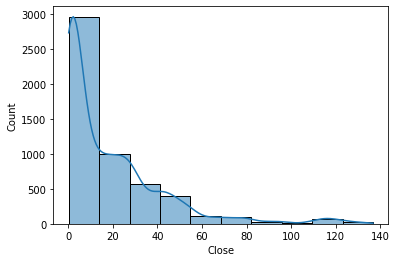

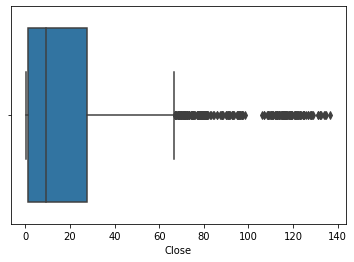

In [ ]:
# Write the code here
sns.histplot(data = df, x='Close',bins = 10, stat = 'count',kde=True)
plt.show()
sns.boxplot(data = df, x='Close')
plt.show();

Observation on Close The histplot is skewed to the left, that is,more towards lower costs, however we note that there is a slight peak at around 120 dollars. The boxplot indicates that the median cost is about 10 dollars.

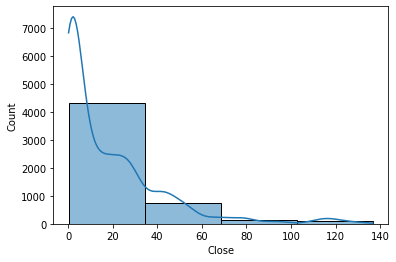

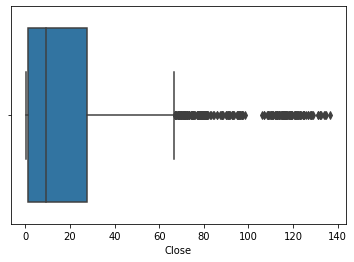

In [ ]:
# For rating we eliminate unrated rows to prevent bias
df5 = df[df['Close']!= 0]

sns.histplot(data = df5, x='Close',bins = 4,stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df5, x='Close')
plt.show();


Observations on Rating:
For the close,considering that there are about 38.77% unrated orders, the histplot shows that the ratings are concentrated around the maximum rating, but the boxplot is heavily skewed to the left such that we do not have the right whisker.

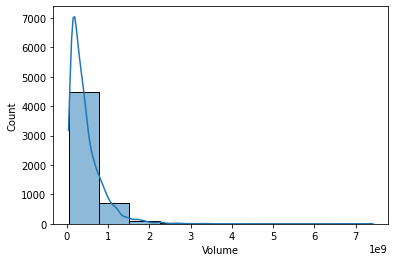

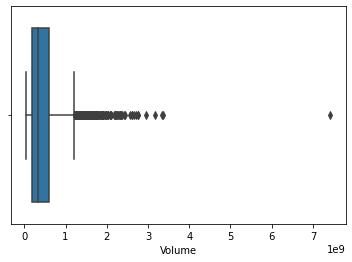

In [ ]:

sns.histplot(data = df, x='Volume',bins = 10, stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df, x='Volume')
plt.show();

Observation on Volume:
The histplot is skewed to the left, that is more towards lower volume. The boxplot indicates that the median volume is about 0 to 1 billion.

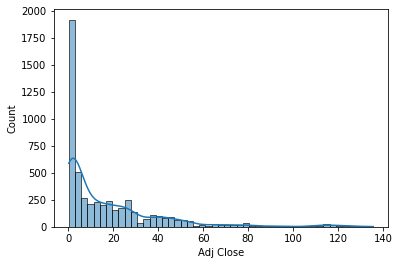

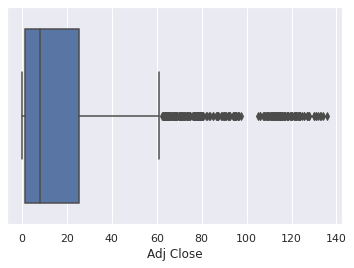

In [ ]:
# Write the code here
sns.histplot(data = df, x='Adj Close', stat = 'count',kde = True,)
sns.set_theme(style="darkgrid")
plt.show()
sns.boxplot(data = df, x='Adj Close')
plt.show();

Observations on Delivery Time:
The median Adj close is about 10 dollars with the observations being skewed to the left. From the histplot we can determine that most close are between 0 and 20 dollars.



Question 7: The company wants to analyze the return made by end of the day.

In [ ]:
df['Returns'] = df['Close'].pct_change()
df = df.dropna()
df


,Date,Open,High,Low,Close,Adj Close,Volume,Returns
1,04-01-2000,0.966518,0.987723,0.903460,0.915179,0.783644,512377600,-0.084310
2,05-01-2000,0.926339,0.987165,0.919643,0.928571,0.795112,778321600,0.014633
3,06-01-2000,0.947545,0.955357,0.848214,0.848214,0.726304,767972800,-0.086538
4,07-01-2000,0.861607,0.901786,0.852679,0.888393,0.760708,460734400,0.047369
5,10-01-2000,0.910714,0.912946,0.845982,0.872768,0.747329,505064000,-0.017588
...,...,...,...,...,...,...,...,...
5279,24-12-2020,131.320007,133.460007,131.100006,131.970001,130.994522,54930100,0.007712
5280,28-12-2020,133.990005,137.339996,133.509995,136.690002,135.679642,124486200,0.035766
5281,29-12-2020,138.050003,138.789993,134.339996,134.869995,133.873093,121047300,-0.013315
5282,30-12-2020,135.580002,135.990005,133.399994,133.720001,132.731583,96452100,-0.008527


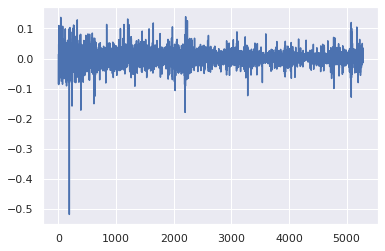

In [ ]:
plt.plot(df['Returns'])
plt.show()

Question 8: What percentage of the return cost is positive (Return>0)?

In [ ]:
# Do a count of total Returns
total_rt = df['Returns'].count()
rt_above1 = df['Returns'][df['Returns']> 0].count()
# Compute the percent of the Returns above $0
percentage_above20 = round((rt_above1/total_rt)*100,2) # Rounded to two decimal places
percentage_above20

52.07

Observations: 52.08% of Total days market is positive means return>0.



Question 9: What is the mean of the closing price of the stock?

In [ ]:
avr_del_time = round(df[['Close']].agg('mean'),2) # Rounded to two decimal places
print(avr_del_time)

Close    18.73
dtype: float64


Observations: On average of APPLE stock closing price is 18.74 $.

Question 10: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

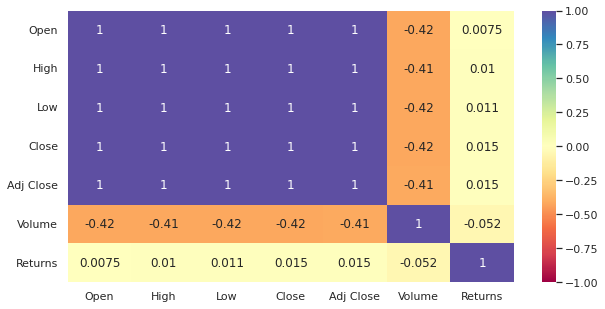

In [ ]:
# Write the code here
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Observations on the Heatmap and pairplot:

The heatmap shows very strong correlation between the variables.

Question 11: The company wants to analyze the close prize of the stock.

In [ ]:
# The code computes the mean delivery time based on the day of the week, however it includes other statistics that maybe useful
# for review alongside the mean
avr_del_time = df.groupby('Close')[['Adj Close']].agg(['mean','sum','count','std'])
avr_del_time

Adj Close                      
                  mean         sum count std
Close                                       
0.234286      0.200613    0.200613     1 NaN
0.234643      0.200919    0.200919     1 NaN
0.235714      0.201836    0.201836     1 NaN
0.236429      0.202448    0.202448     1 NaN
0.238393      0.204130    0.204130     1 NaN
...                ...         ...   ...  ..
132.690002  131.709213  131.709213     1 NaN
133.720001  132.731583  132.731583     1 NaN
134.179993  132.958801  132.958801     1 NaN
134.869995  133.873093  133.873093     1 NaN
136.690002  135.679642  135.679642     1 NaN

[4810 rows x 4 columns]

# Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

<AxesSubplot:>

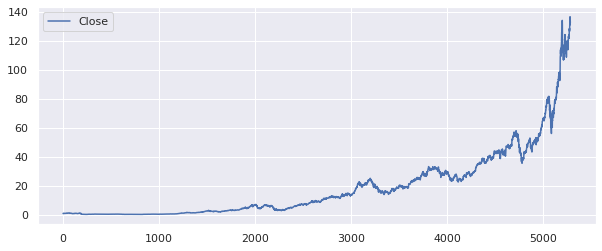

In [ ]:
# Let's see a historical view of the closing price
df['Close'].plot(legend=True, figsize=(10,4))

# Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

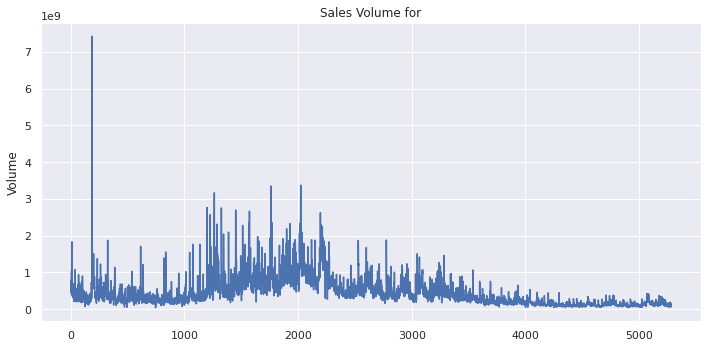

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(10, 5),)
plt.subplots_adjust(top=1.25, bottom=1.2)

# for i, company in enumerate(company_list, 1):
#     plt.subplot(2, 2, i)
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for")

plt.tight_layout()

# What was the daily return of the stock on average?
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

Text(0.5, 1.0, 'APPLE')

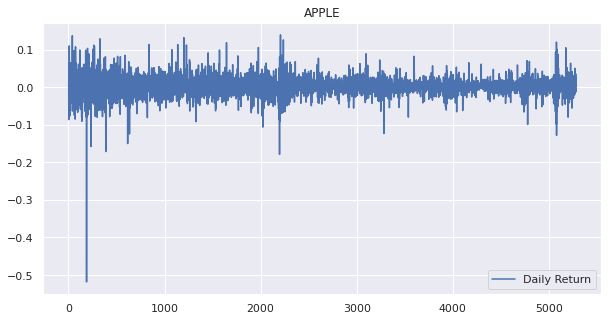

In [ ]:
df['Daily Return'] = df['Adj Close'].pct_change()

# Then we'll plot the daily return percentage

df['Daily Return'].plot(legend=True , figsize=(10,5))
plt.title('APPLE')

now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

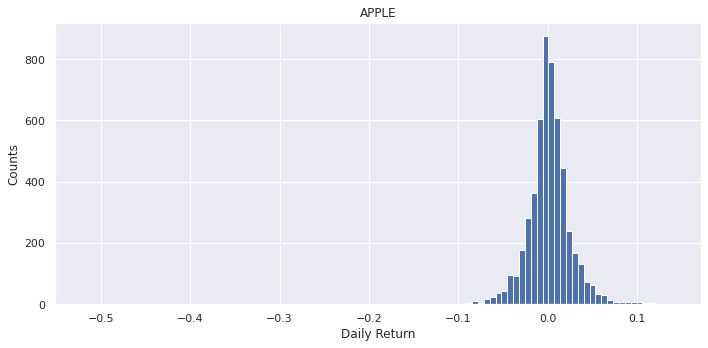

In [ ]:
plt.figure(figsize=(10,5))

df['Daily Return'].hist(bins=100)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('APPLE')

plt.tight_layout()

# ARMA MODEL

In [ ]:
from statsmodels.tsa.api import ARMA

In [ ]:
for i in range(9):
    model = ARMA(df['Returns'],order= (i,i))
    results = model.fit()
    print('At order=',i,', AIC = ',results.aic)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

At order= 0 , AIC =  -23729.35888668033
At order= 1 , AIC =  -23736.636714152926


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


At order= 2 , AIC =  -23733.367359551274


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ValueError: ignored

In [ ]:
result.plot_predict(start = 3008 ,end = 3028,alpha = 0)

NameError: ignored

# ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
aic_vals = []
for i in range(3):
    model = ARIMA(df['Returns'],order=(0,i,0))
    result = model.fit()
    aic_vals.append(result.aic)
    if i == 0:
        continue

    print("At order =",i-1," AIC Value = ",aic_vals[i-1])

At order = 0  AIC Value =  -23729.35888668033
At order = 1  AIC Value =  -19837.512933429844


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_mode

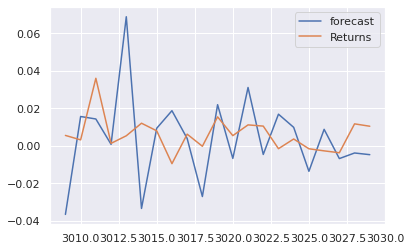

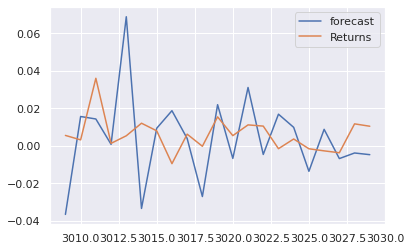

In [ ]:
result.plot_predict(start = 3008 ,end = 3028,alpha = 0)


#**Conclusion and summary of Key observations:**
In this model we are also able to take decision made by the model
with use of predication. For optimal profit, we should update stop loss with current
interval’s high price if it is a Short sell (low price if it was a Buy call) as we move
further to look if there is a crossover. Based on these observations, we theoretically
believe that this model best suits to predict the trend in real time market.

With closing of market concentrated around the high score of 136.69.
The Volume of the APPLE stock is between **0 to 1 billion** and in **52.08%** of Total market days it is positive for investments.